In [1]:
options(tidyverse.quiet = TRUE,
        repr.plot.width = 8,
        repr.plot.height = 5)

library("tidyverse")
library("cowplot")
library("gapminder")
library("ggridges") 
library("scales")


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************



Attaching package: 'ggridges'


The following object is masked from 'package:ggplot2':

    scale_discrete_manual



Attaching package: 'scales'


The following object is masked from 'package:purrr':

    discard


The following object is masked from 'package:readr':

    col_factor




In [3]:
data <- read_csv("./data/aac_data_cleaned.csv")

Parsed with column specification:
cols(
  animal_type = col_character(),
  intake_monthyear = col_datetime(format = ""),
  intake_weekday = col_character(),
  `age_upon_intake_(days)` = col_double(),
  intake_condition = col_character(),
  outcome_monthyear = col_datetime(format = ""),
  outcome_weekday = col_character(),
  `age_upon_outcome_(days)` = col_double(),
  total_time_in_shelter_days = col_double(),
  outcome_types = col_character(),
  intake_year = col_double(),
  outtake_year = col_double(),
  intake_month = col_double(),
  outtake_month = col_double()
)



In [4]:
head(data)

animal_type,intake_monthyear,intake_weekday,age_upon_intake_(days),intake_condition,outcome_monthyear,outcome_weekday,age_upon_outcome_(days),total_time_in_shelter_days,outcome_types,intake_year,outtake_year,intake_month,outtake_month
<chr>,<dttm>,<chr>,<dbl>,<chr>,<dttm>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Dog,2017-12-01,Thursday,3650,Normal,2017-12-01,Thursday,3650,2.9618056,Return to Owner,2017,2017,12,12
Dog,2014-04-01,Wednesday,3650,Normal,2014-04-01,Monday,3650,4.9701389,Transfer,2014,2014,4,4
Dog,2013-11-01,Saturday,5840,Injured,2013-11-01,Saturday,5840,0.1194444,Return to Owner,2013,2013,11,11
Dog,2013-11-01,Saturday,5475,Aged,2013-11-01,Sunday,5475,0.8708333,Return to Owner,2013,2013,11,11
Dog,2014-11-01,Friday,5475,Normal,2014-11-01,Friday,5475,0.1784722,Return to Owner,2014,2014,11,11
Dog,2014-09-01,Monday,5475,Normal,2014-09-01,Monday,5475,0.2131944,Return to Owner,2014,2014,9,9


In [52]:
data_2017_intake <- data %>%
    filter(intake_year == 2017) %>%
    group_by(intake_year,animal_type,intake_weekday,intake_month) %>%
    summarise(cnt = n()) %>%
    group_by(intake_weekday) %>%
    summarise(count = round(mean(cnt),0))

In [53]:
data_2017_intake$intake_weekday <- factor(data_2017_intake$intake_weekday,levels = c("Sunday","Monday","Tuesday","Wednesday","Thursday","Friday", "Saturday"))

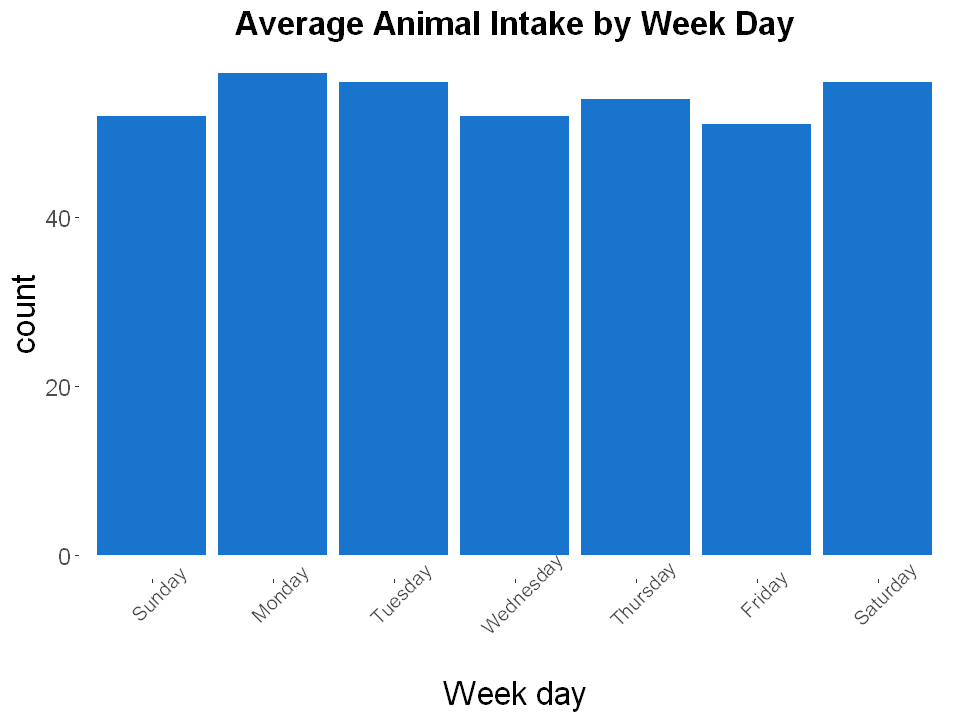

In [54]:
options(repr.plot.width=8,repr.plot.height=6)
p <- ggplot(data_2017_intake, aes(y=count, x=intake_weekday)) + 
    geom_bar(position="dodge", stat="identity", fill="dodgerblue3") +
    labs(title = "Average Animal Intake by Week Day", x = "Week day") +
    theme(plot.title = element_text(size = 20, face = "bold",hjust = 0.5),
         axis.text.x = element_text(size = 12, angle = 45),
         axis.title.x = element_text(size = 20),
         axis.title.y = element_text(size = 20),
         axis.text.y = element_text(size = 14),
         panel.background = element_blank()) 
        
p

In [56]:
data_2017_outtake <- data %>%
    filter(outtake_year == 2017) %>%
    group_by(outtake_year,animal_type,outcome_weekday,outtake_month) %>%
    summarise(cnt = n()) %>%
    group_by(outcome_weekday) %>%
    summarise(count = round(mean(cnt),0))

In [58]:
data_2017_outtake$outcome_weekday <- factor(data_2017_outtake$outcome_weekday,levels = c("Sunday","Monday","Tuesday","Wednesday","Thursday","Friday", "Saturday"))

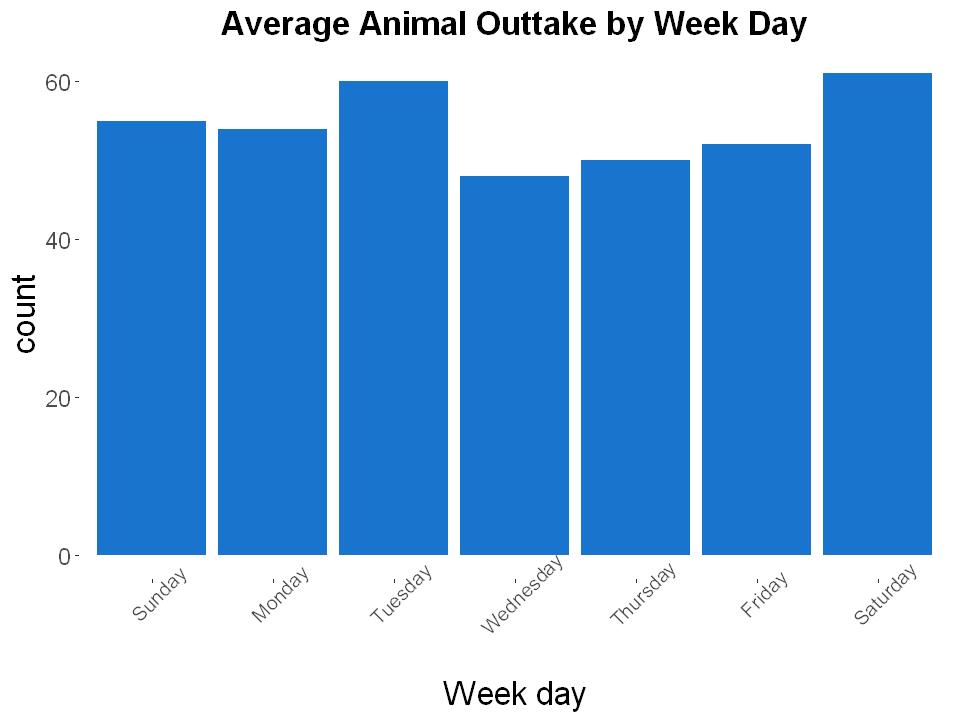

In [61]:
p <- ggplot(data_2017_outtake, aes(y=count, x=outcome_weekday)) + 
    geom_bar(position="dodge", stat="identity", fill="dodgerblue3") +
    labs(title = "Average Animal Outtake by Week Day", x = "Week day") +
    theme(plot.title = element_text(size = 20, face = "bold",hjust = 0.5),
         axis.text.x = element_text(size = 12, angle = 45),
         axis.title.x = element_text(size = 20),
         axis.title.y = element_text(size = 20),
         axis.text.y = element_text(size = 14),
         panel.background = element_blank()) 
        
p